In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
db = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/SolarPrediction.csv")

In [3]:
db = db.sort_values(['UNIXTime'], ascending = [True])
db

,UNIXTime,Data,Time,Radiation1,Radiation2,Radiation3,Y,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7416,1472724008,42378,0.000093,2.58,1.26,1.26,1.26,51,30.43,103,77.27,11.25,0.254861,0.776389
7415,1472724310,42378,0.003588,2.83,2.58,1.26,1.26,51,30.43,103,153.44,9.00,0.254861,0.776389
7414,1472725206,42378,0.013958,2.16,2.83,2.58,1.26,51,30.43,103,142.04,7.87,0.254861,0.776389
7413,1472725505,42378,0.017419,2.21,2.16,2.83,2.58,51,30.43,103,144.12,18.00,0.254861,0.776389
7412,1472725809,42378,0.020938,2.25,2.21,2.16,2.83,51,30.43,103,67.42,11.25,0.254861,0.776389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24526,1483263302,12/31/2016 12:00:00 AM,0.982662,1.22,1.20,1.19,1.22,41,30.34,83,238.94,6.75,0.289583,0.745833
24525,1483263601,12/31/2016 12:00:00 AM,0.986123,1.21,1.22,1.20,1.19,41,30.34,82,236.79,5.62,0.289583,0.745833
24524,1483263904,12/31/2016 12:00:00 AM,0.989630,1.21,1.21,1.22,1.20,42,30.34,81,218.28,7.87,0.289583,0.745833
24523,1483264203,12/31/2016 12:00:00 AM,0.993090,1.19,1.21,1.21,1.22,41,30.34,80,215.23,7.87,0.289583,0.745833


In [5]:
from datetime import datetime   #funções das 6 primeiras linhas
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu') #
db.index =  pd.to_datetime(db['UNIXTime'], unit='s')
db.index = db.index.tz_localize(pytz.utc).tz_convert(hawaii)
db['MonthOfYear'] = db.index.strftime('%m').astype(int)
db['DayOfYear'] = db.index.strftime('%j').astype(int)
db['WeekOfYear'] = db.index.strftime('%U').astype(int)
db['TimeOfDay(h)'] = db.index.hour
db['TimeOfDay(m)'] = db.index.hour*60 + db.index.minute
db['TimeOfDay(s)'] = db.index.hour*60*60 + db.index.minute*60 + db.index.second
db.drop(['Data','Time','UNIXTime'], inplace=True, axis=1)
db.head()

,Radiation1,Radiation2,Radiation3,Y,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s)
UNIXTime,,,,,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,2.58,1.26,1.26,1.26,51,30.43,103,77.27,11.25,0.254861,0.776389,9,245,35,0,0,8
2016-09-01 00:05:10-10:00,2.83,2.58,1.26,1.26,51,30.43,103,153.44,9.00,0.254861,0.776389,9,245,35,0,5,310
2016-09-01 00:20:06-10:00,2.16,2.83,2.58,1.26,51,30.43,103,142.04,7.87,0.254861,0.776389,9,245,35,0,20,1206
2016-09-01 00:25:05-10:00,2.21,2.16,2.83,2.58,51,30.43,103,144.12,18.00,0.254861,0.776389,9,245,35,0,25,1505
2016-09-01 00:30:09-10:00,2.25,2.21,2.16,2.83,51,30.43,103,67.42,11.25,0.254861,0.776389,9,245,35,0,30,1809


In [7]:
X = db.drop('Y', axis = 1)
X = StandardScaler().fit_transform(X)
y = db['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Training MLPRegressor...") #20, 50, 100, 150
reg = MLPRegressor(hidden_layer_sizes =(20,20,20,20,20 ),solver='adam',activation = 'relu',learning_rate='adaptive',learning_rate_init = 0.1,max_iter=10000, shuffle = False)
reg.fit(X_train,y_train)

Training MLPRegressor...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Resultados
Mean squared error: 6228.81
Variance score: 0.94


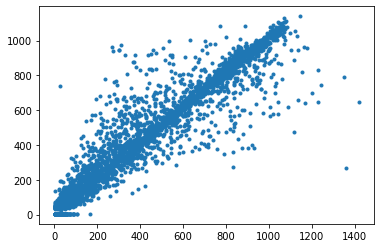

In [8]:
y_predict= reg.predict(X_test)
print("Resultados")
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predict))
print('Variance score: %.2f' % r2_score(y_test, y_predict))
plt.scatter(y_test,y_predict,marker='.')
plt.show()

teste de overfiting
Mean squared error: 6229.23
Variance score: 0.94


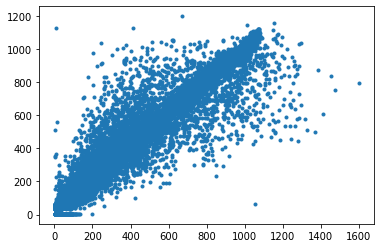

In [9]:
y_predict_train = reg.predict(X_train)
print("teste de overfiting")
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, y_predict_train))
print('Variance score: %.2f' % r2_score(y_train, y_predict_train))
plt.scatter(y_train,y_predict_train,marker='.')
plt.show()


In [ ]:
l=db.loc(0)
print(l)